In [31]:
import keras
import pandas as pd
import tensorflow as tf

In [32]:
print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)
print('GPUs available: ', tf.config.experimental.list_physical_devices('GPU'))

Keras version:  3.5.0
Tensorflow version:  2.17.0
GPUs available:  []


In [33]:
data_1 = pd.read_csv('mit-bih-data-clear-data.csv')
data_2 = pd.read_csv('ptb-diagnostic-clear-data.csv')
data_3 = pd.read_csv('autonomic-aging-a-dataset-clear-data.csv')


# Feature cleanup
df = pd.concat([data_1, data_2, data_3], ignore_index=True)
df.to_csv('heart_rate_final_data.csv', index=False)
columns_to_drop = [
    'patient',
    'Max_hr_slope',
    'mean_deviation',
    'outliers_percentage'
]

columns_to_reduce = [
    'vlf_power',
    'lf_power',
    'hf_power',
    'highest_heart_rate',
    'lowest_heart_rate',
    'mean_heart_rate',
    'median_heart_rate'
    
]

df[columns_to_reduce] = df[columns_to_reduce].apply(lambda x: x/100)
df.drop(columns_to_drop, axis=1, inplace=True)


df.value_counts('diagnosis')


diagnosis
0    1162
1     487
Name: count, dtype: int64

In [34]:
# Let's check for missing values

df.isnull().sum()


diagnosis                      0
highest_heart_rate             0
lowest_heart_rate              0
mean_heart_rate                0
median_heart_rate              0
standard_deviation_hr          0
minimum_hrv                    0
maximum_hrv                    0
mean_hrv                       0
median_hrv                     0
standard_deviation_hrv         0
mean_hr_slope                  0
tendency_slope                 0
standard_deviation_hr_slope    0
vlf_power                      0
lf_power                       0
hf_power                       0
mean_rr                        0
standard_deviation_rr          0
minimum_rr                     0
maximum_rr                     0
tendency_standard_deviation    0
approximation_entropy          0
sample_entropy                 2
dtype: int64

In [35]:
# Replace missing and infinite values with median
from sklearn.impute import SimpleImputer
import numpy as np
df.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [36]:
# Resample the data

# Scenario 1: This works fine, however, this duplicates data and can lead to overfitting

# from sklearn.utils import resample
# 
# df_majority = df[df.diagnosis==1]
# df_minority = df[df.diagnosis==0]
# 
# df_minority_upsampled = resample(df_minority, replace=True, n_samples=487)
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# df_upsampled.value_counts('diagnosis')

# Scenario 2: Let's use smote to generate synthetic data

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
X_resampled, y_resampled = smote.fit_resample(X, y)

df_upsampled = pd.concat([X_resampled, y_resampled], axis=1)




In [37]:
df_upsampled.value_counts('diagnosis')

diagnosis
0.0    1162
1.0    1162
Name: count, dtype: int64

In [38]:
X = df_upsampled.drop(columns=['diagnosis'])
y = df_upsampled['diagnosis']

X.head()

,highest_heart_rate,lowest_heart_rate,mean_heart_rate,median_heart_rate,standard_deviation_hr,minimum_hrv,maximum_hrv,mean_hrv,median_hrv,standard_deviation_hrv,...,vlf_power,lf_power,hf_power,mean_rr,standard_deviation_rr,minimum_rr,maximum_rr,tendency_standard_deviation,approximation_entropy,sample_entropy
0,1.130890,1.028571,1.081274,1.085427,2.022095,0.501672,5.685571,0.645095,0.000000,0.926676,...,4.893324,61.726334,221.350711,3.906391,2.105712,1.069444,12.505556,0.702512,1.408457,1.177573
1,1.136842,0.847059,0.963004,0.951542,5.026822,0.346988,12.139094,1.013533,0.410101,1.456583,...,17.896511,145.833155,367.016413,6.039207,3.036317,1.075000,33.636111,4.329784,1.282741,1.121386
2,0.903766,0.640950,0.758583,0.757895,4.681641,0.198950,12.804878,1.090299,0.000000,1.755623,...,42.477758,192.530932,311.683614,10.013405,6.048494,2.150000,30.163889,3.849098,1.307559,1.043753
3,0.843750,0.708197,0.755022,0.750000,2.644870,0.237619,5.898876,0.629692,0.000000,0.959347,...,16.714324,68.667396,209.085037,6.649409,2.325983,1.527778,18.361111,2.302985,1.226100,1.048676
4,0.540000,0.478936,0.507868,0.508235,0.903975,0.109323,2.010028,0.251715,0.111317,0.363182,...,7.649133,28.059190,67.323863,10.148943,5.530223,2.288889,30.327778,0.644782,1.558320,1.377851


In [39]:
from sklearn.impute import SimpleImputer
import numpy as np
X.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

df.head()

,diagnosis,highest_heart_rate,lowest_heart_rate,mean_heart_rate,median_heart_rate,standard_deviation_hr,minimum_hrv,maximum_hrv,mean_hrv,median_hrv,...,vlf_power,lf_power,hf_power,mean_rr,standard_deviation_rr,minimum_rr,maximum_rr,tendency_standard_deviation,approximation_entropy,sample_entropy
0,1.0,1.130890,1.028571,1.081274,1.085427,2.022095,0.501672,5.685571,0.645095,0.000000,...,4.893324,61.726334,221.350711,3.906391,2.105712,1.069444,12.505556,0.702512,1.408457,1.177573
1,1.0,1.136842,0.847059,0.963004,0.951542,5.026822,0.346988,12.139094,1.013533,0.410101,...,17.896511,145.833155,367.016413,6.039207,3.036317,1.075000,33.636111,4.329784,1.282741,1.121386
2,1.0,0.903766,0.640950,0.758583,0.757895,4.681641,0.198950,12.804878,1.090299,0.000000,...,42.477758,192.530932,311.683614,10.013405,6.048494,2.150000,30.163889,3.849098,1.307559,1.043753
3,1.0,0.843750,0.708197,0.755022,0.750000,2.644870,0.237619,5.898876,0.629692,0.000000,...,16.714324,68.667396,209.085037,6.649409,2.325983,1.527778,18.361111,2.302985,1.226100,1.048676
4,1.0,0.540000,0.478936,0.507868,0.508235,0.903975,0.109323,2.010028,0.251715,0.111317,...,7.649133,28.059190,67.323863,10.148943,5.530223,2.288889,30.327778,0.644782,1.558320,1.377851


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [42]:
from keras import Sequential
from keras.api.layers import Dense, Dropout



model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.4),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

/home/gino/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.000001), loss='binary_crossentropy', metrics=['accuracy'])


from keras.api.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model.keras', save_best_only=True)

history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=3000, callbacks=[checkpoint])


Epoch 1/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5127 - loss: 0.6979 - val_accuracy: 0.5330 - val_loss: 0.6938
Epoch 2/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5022 - loss: 0.6991 - val_accuracy: 0.5415 - val_loss: 0.6932
Epoch 3/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 0.6985 - val_accuracy: 0.5659 - val_loss: 0.6927
Epoch 4/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4838 - loss: 0.7004 - val_accuracy: 0.5802 - val_loss: 0.6921
Epoch 5/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5213 - loss: 0.6962 - val_accuracy: 0.5974 - val_loss: 0.6915
Epoch 6/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5415 - loss: 0.6946 - val_accuracy: 0.6218 - val_loss: 0.6909
Epoch 7/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5472 - loss: 0.6931 - val_accuracy: 0.6461 - val_loss: 0.6904
Epoch 8/3000
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5319 - loss: 0.6936 - val_accuracy: 0.

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Loss: {loss:.4f}')

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.9739 - loss: 0.0943
Test Accuracy: 0.9742
Test Loss: 0.0962


In [45]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = (model.predict(X_test) > 0.6).astype("int32")
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix:
 [[333  16]
 [  2 347]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       349
         1.0       0.96      0.99      0.97       349

    accuracy                           0.97       698
   macro avg       0.97      0.97      0.97       698
weighted avg       0.97      0.97      0.97       698



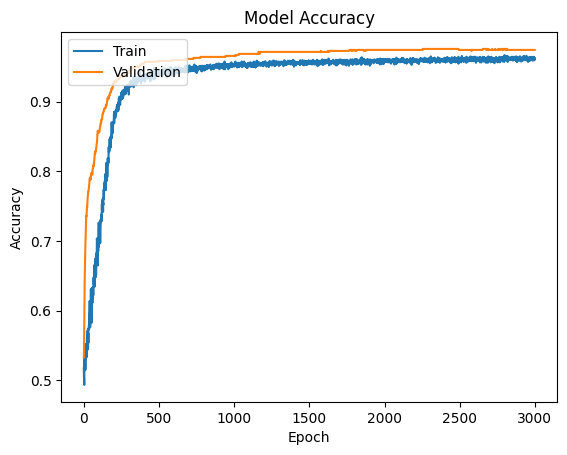

In [46]:
# visualize loss and accuracy in plots
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


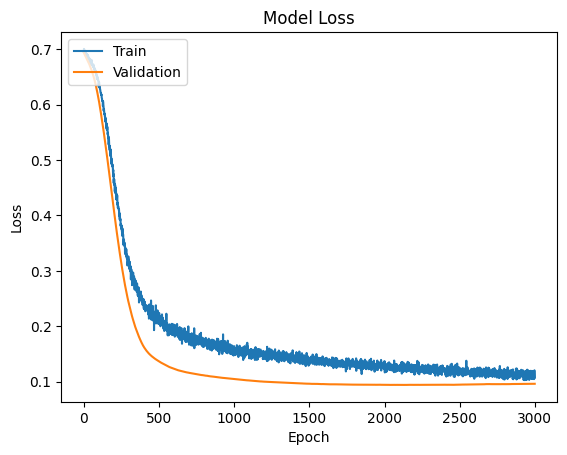

In [47]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()